<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/deeplearning_bookIMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.datasets import imdb
from keras import layers , models
from tensorflow.keras import optimizers

In [ ]:
(train_data,train_labels) , (test_data,test_labels) = imdb.load_data(num_words = 10000)
train_data[0]

In [36]:
word_index = imdb.get_word_index()

In [37]:
#imdb.get_word_index() The word index dictionary. Keys are word strings, values are their index.
word_index = imdb.get_word_index() #word_index is a dictionary

#word_index.items() ==> returns a list each element is tuple first element is key and second element is value
#list comperhensive to reverse the places [indexes] of tuple elements(key and value)
#then convert it to dictionary
#reverse_word_index is a dictionary exactly like word_index but key and value are reversed
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 

#.get function used with dictionary and take key as a first element and return the value specified with this key 
#.get take optional parameter in our case is "?" which is returned if key is not found in dictionary keys
#train_data[0] is a list of numbers that are just indexes of words that represent comment of first sample
#decoded_review is just the comment of first sample in string form
#train_data[0] is just the comment of first sample in term of indexes of words in that comment
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [38]:
print("train_data shape is ",train_data.shape)
print("test_data shape is ",test_data.shape)
print("train_labels shape is ",train_labels.shape)
print("test shape is ",test_labels.shape)

train_data shape is  (25000,)
test_data shape is  (25000,)
train_labels shape is  (25000,)
test shape is  (25000,)


In [40]:
#up to now the train data and test data are in form of list of integers
#neural network can not deal with lists
#we want to convert it to tensors 
#this can be done by two way first by
#[1]-pading lists to be in form of list tensor shape will be (num_samples,word_indexes) 
#note that train_data[i] not fixed length it depend on the index so we need to pade small samples to biger on 
#[2]-by hot encoding of all samples to a fixed length (10000)[that equal to the number of words we have chosen in cell 2 first line]
#this will return tensor dimension [num_samples,10000]
#this can be done by following function 

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  """
  this functoin take two parameters 
  first one is sequences such as train_data or test_data
  second one is dimention we need to add 
  returns a results its dimention is [len(sequences),dimention]
  """
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences): # i represent the index of sample , sequence will be list of word indexes  of first sample(comment)
  #every row of result will contains only 1s and 0s 
  #1 at index found in sequence and 0 elsewhere

    results[i, sequence] = 1.
  return results






In [41]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [42]:
x_train.shape

(25000, 10000)

In [43]:
#just convert type to float32 instead of float64
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



In [56]:
#now we will construct the model 
#since the input and output just zeros and ones all we need is Dense hidden layers
model = models.Sequential()
model.add(layers.Dense(16,activation = "relu",input_shape =(10000,)))
model.add(layers.Dense(16,activation= "relu"))
model.add(layers.Dense(1,activation = "sigmoid"))



In [57]:
#binary_crossentropy loss is best choice for binary classification
""" Crossentropy is a quantity from the field of Information Theory that 
measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions. """
#model.compile(optimizer="rmsprop",loss="Crossentropy",metrics =["accuracy"])

#another code do the same thing
#this provide more control on optimizer and learning rate
model.compile(optimizer=optimizers.Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [58]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
partial_y_train = y_train[5000:]
y_val = y_train[:5000]


In [69]:
history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=256, validation_data=(x_val, y_val))

Epoch 1/4
79/79 [==============================] - 3s 39ms/step - loss: 0.0755 - accuracy: 0.9785 - val_loss: 0.3734 - val_accuracy: 0.8770
Epoch 2/4
79/79 [==============================] - 2s 20ms/step - loss: 0.0493 - accuracy: 0.9880 - val_loss: 0.4240 - val_accuracy: 0.8778
Epoch 3/4
79/79 [==============================] - 1s 18ms/step - loss: 0.0289 - accuracy: 0.9956 - val_loss: 0.4742 - val_accuracy: 0.8738
Epoch 4/4
79/79 [==============================] - 1s 17ms/step - loss: 0.0179 - accuracy: 0.9984 - val_loss: 0.5318 - val_accuracy: 0.8730


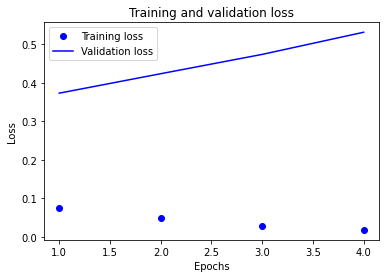

In [73]:
import matplotlib.pyplot as plt
history_dict = history.history #return history dictionary which consist of 4 keys (['loss', 'accuracy', 'val_loss', 'val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

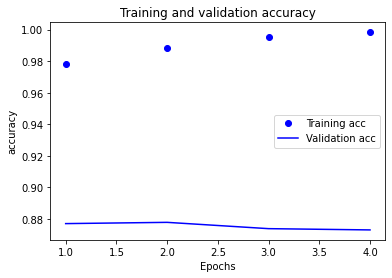

In [74]:
plt.clf()# to clear current figure if found
acc = history_dict["accuracy"]
val_acc  = history_dict["val_accuracy"]
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [75]:
results = model.evaluate(x_test, y_test) #to evaluate model performance in test data it returns loss and accuracy [metrics["accuracy"]]

782/782 [==============================] - 2s 2ms/step - loss: 0.5684 - accuracy: 0.8600


In [76]:
results

[0.568392276763916, 0.8599600195884705]

In [77]:
#to use model for predicting new data
y_pred = model.predict(x_test)
y_pred

array([[0.01491663],
       [1.        ],
       [0.2938857 ],
       ...,
       [0.02517456],
       [0.00617856],
       [0.9665668 ]], dtype=float32)